In [25]:
# importing libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten, Conv2D, MaxPool2D, Dropout 
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [26]:
# reading dataset
train_data = pd.read_csv('/content/drive/My Drive/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/test.csv')

In [31]:
# checking for null values
train_data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [32]:
test_data.isnull().sum()

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

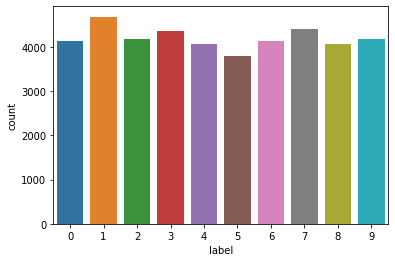

In [29]:
# count of digits per class (0-9)
count_plot = sns.countplot(train_data['label'])

In [42]:
# dependent feaature (y) and independent features (X)
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]
test_X = test_data

In [43]:
# splitting into training and validation set
X_train , X_test , Y_train , Y_test = train_test_split(X,y,test_size=0.2,random_state = 0)

In [44]:
# changing datatype to float for normalization purpose
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
test_X = test_X.astype('float32')

In [45]:
# normalization - each pixel will have value between 0 to 1 when divided by 255
X_train = X_train / 255.0
X_test = X_test / 255.0 
test_X = test_X / 255.0

In [47]:
# converting into numpy arrays 
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
test_X = test_X.to_numpy()

In [48]:
# reshaping the arrays into arrays of 28x28 with one channel
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)
test_X = test_X.reshape(-1,28,28,1)

In [49]:
# converting categorical labels to one hot encoded labels
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [50]:
# creating a CNN 
model = Sequential()
model.add(Conv2D(input_shape=(28,28,1),filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(10, activation='softmax'))

opt = Adam()

model.compile(optimizer = opt , loss ='categorical_crossentropy', metrics=['accuracy'])

In [51]:
# structure of our CNN model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 128)        

In [54]:
# performing image data augmentation
datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        fill_mode='nearest',  
        horizontal_flip=True,  
        vertical_flip=True)  

datagen.fit(X_train)

In [58]:
# training the model
fit_model = model.fit(datagen.flow(X_train,Y_train, batch_size=500),
                              epochs = 10, validation_data = (X_test,Y_test),
                              verbose = 2)

Epoch 1/10
68/68 - 380s - loss: 0.3261 - accuracy: 0.8942 - val_loss: 0.2043 - val_accuracy: 0.9361
Epoch 2/10
68/68 - 382s - loss: 0.3125 - accuracy: 0.8989 - val_loss: 0.2210 - val_accuracy: 0.9335
Epoch 3/10
68/68 - 379s - loss: 0.2930 - accuracy: 0.9032 - val_loss: 0.2052 - val_accuracy: 0.9314
Epoch 4/10
68/68 - 382s - loss: 0.2812 - accuracy: 0.9092 - val_loss: 0.1842 - val_accuracy: 0.9412
Epoch 5/10
68/68 - 382s - loss: 0.2637 - accuracy: 0.9133 - val_loss: 0.1584 - val_accuracy: 0.9481
Epoch 6/10
68/68 - 378s - loss: 0.2528 - accuracy: 0.9177 - val_loss: 0.1767 - val_accuracy: 0.9436
Epoch 7/10
68/68 - 382s - loss: 0.2485 - accuracy: 0.9186 - val_loss: 0.1563 - val_accuracy: 0.9508
Epoch 8/10
68/68 - 382s - loss: 0.2375 - accuracy: 0.9215 - val_loss: 0.1581 - val_accuracy: 0.9492
Epoch 9/10
68/68 - 379s - loss: 0.2243 - accuracy: 0.9261 - val_loss: 0.1385 - val_accuracy: 0.9585
Epoch 10/10
68/68 - 382s - loss: 0.2253 - accuracy: 0.9276 - val_loss: 0.1749 - val_accuracy: 0.9436

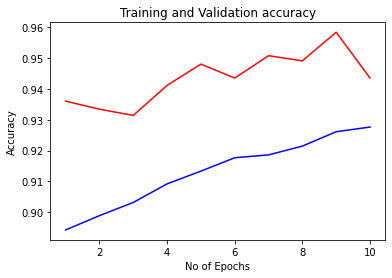

In [59]:
# plotting training and validation accuracy vs number of epochs
acc = fit_model.history['accuracy']
val_acc = fit_model.history['val_accuracy']
epochs = range(1, len(acc) + 1)
plt.title('Training and Validation accuracy')
plt.plot(epochs, acc, 'blue')
plt.xlabel('No of Epochs')
plt.plot(epochs, val_acc, 'red')
plt.ylabel('Accuracy')
plt.show()

In [81]:
# performing prediction on test data
ypred = model.predict_classes(test_X>0.5)

In [82]:
# preparing output dataframe
results = pd.Series(ypred,name='Label')
output = pd.concat([pd.Series(range(1,28001),name = 'ImageId'),results],axis = 1)
output.to_csv('digit_recognizer.csv',index=False)